### Midterm Project

In [258]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [50]:
df= pd.read_csv("diabetes_prediction_dataset.csv")

In [51]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [53]:
column_types = df.dtypes

In [54]:
column_types

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [55]:
column_names = df.columns

In [56]:
column_names

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

# STAGE 01

## Data cleaning

### 👉 Cheking Age

### Changing the data type of "Age"

In [57]:
df['age'] = df['age'].astype("int64")

In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 6.9+ MB


### 👉 Cheking Gender

In [59]:
df["gender"].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [60]:
df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

### Let's replace "other" to "female"!

In [61]:
df['gender'].replace(['Other'], ["Female"], inplace=True)

In [62]:
df["gender"].value_counts()

Female    58570
Male      41430
Name: gender, dtype: int64

### 👉 Cheking Hypertension

In [63]:
df['hypertension'].unique()

array([0, 1], dtype=int64)

### 👉 Cheking heart_disease

In [64]:
df['heart_disease'].unique()

array([1, 0], dtype=int64)

### 👉 Cheking Smoking_History

In [65]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [66]:
df["smoking_history"].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

### Dropping the "No info" rows 

In [67]:
df.drop(df[(df["smoking_history"]=="No Info")].index,inplace=True)

In [68]:
df["smoking_history"].value_counts()

never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

### Merge "ever" with "never" and "not current" with "former"

In [69]:
df["smoking_history"] = df["smoking_history"].replace({"ever":"never","not current":"former"})

In [70]:
df["smoking_history"].value_counts()

never      39099
former     15799
current     9286
Name: smoking_history, dtype: int64

### 👉 Cheking BM! 

In [71]:
df["bmi"].unique()

array([25.19, 27.32, 23.45, ..., 49.25, 59.42, 60.52])

In [72]:
df["bmi"].value_counts()

27.32    12047
25.60       83
25.00       82
23.00       79
25.20       77
         ...  
13.82        1
53.84        1
46.70        1
13.74        1
60.52        1
Name: bmi, Length: 3943, dtype: int64

### 👉 Checking HbA1c_level

In [73]:
df["HbA1c_level"].value_counts()

6.6    5440
6.2    5426
5.7    5376
6.0    5322
6.5    5292
5.8    5291
6.1    5167
3.5    4837
4.8    4740
4.5    4730
4.0    4678
5.0    4675
9.0     548
8.8     546
8.2     541
7.5     534
6.8     528
7.0     513
Name: HbA1c_level, dtype: int64

### 👉 Checking Blood_glucose_level

In [74]:
df["blood_glucose_level"].value_counts()

140    5026
160    5000
159    4970
130    4957
155    4923
145    4878
126    4878
200    4874
158    4460
80     4435
100    4431
90     4386
85     4275
280     599
300     547
260     526
240     518
220     501
Name: blood_glucose_level, dtype: int64

# STAGE 02

In [75]:
numerical_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(include=['object'])

In [76]:
numerical_df = numerical_df.reset_index(drop=True) 

In [77]:
numerical_df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80,0,1,25.19,6.6,140,0
1,28,0,0,27.32,5.7,158,0
2,36,0,0,23.45,5.0,155,0
3,76,1,1,20.14,4.8,155,0
4,20,0,0,27.32,6.6,85,0
...,...,...,...,...,...,...,...
64179,26,0,0,34.34,6.5,160,0
64180,40,0,0,40.69,3.5,155,0
64181,66,0,0,27.83,5.7,155,0
64182,24,0,0,35.42,4.0,100,0


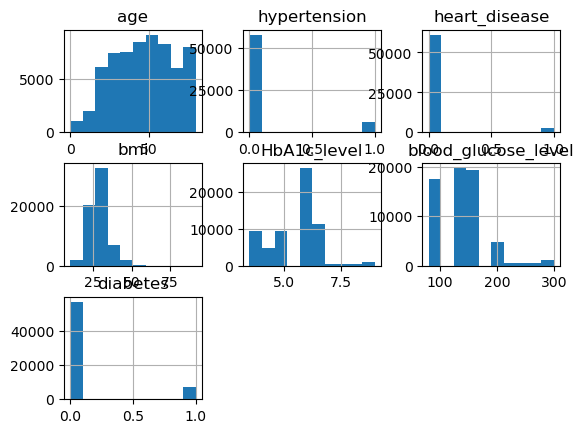

In [78]:
numerical_df.hist()
plt.show()

## To be able to get the correlation of our variable we are goint to plot the Hitmap

### But firts we need to drop the "hypertension" and "heart_disease" columns

In [79]:
#corr= numerical_df.iloc[:,3:6].corr()
#corr

In [80]:
corr= numerical_df.loc[:,['age','bmi', 'HbA1c_level',"blood_glucose_level"]] .corr()


<AxesSubplot:>

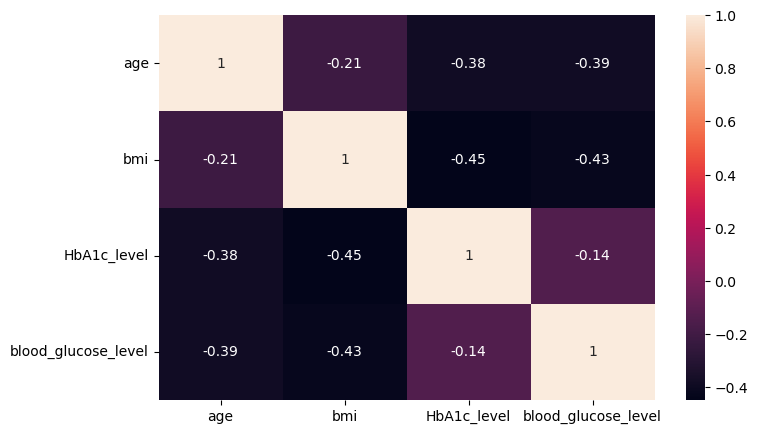

In [81]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(corr.corr(),annot=True)

### Conclusion:
We dont need to drop variable because we dont find a hight correlation.

# STAGE 3

# Transforming our categorical variables into numerical variables

In [87]:
categorical_df.columns

Index(['gender', 'smoking_history'], dtype='object')

### Our variables "gender" and "smoking history" are Nominal ( not Hierarque)

We can use dummys to do the transformation.

In [88]:

# Create dummy variables for the 'Color' and 'Size' columns
dummy_nominals = ['gender', 'smoking_history']
categorical_df = pd.get_dummies(categorical_df, columns=dummy_nominals)



In [89]:
categorical_df = categorical_df.reset_index(drop=True) 

In [90]:
categorical_df

,gender_Female,gender_Male,smoking_history_current,smoking_history_former,smoking_history_never
0,1,0,0,0,1
1,0,1,0,0,1
2,1,0,1,0,0
3,0,1,1,0,0
4,1,0,0,0,1
...,...,...,...,...,...
64179,1,0,0,0,1
64180,1,0,0,0,1
64181,0,1,0,1,0
64182,1,0,0,0,1


In [103]:
numerical_df = numerical_df.reset_index(drop=True) 
numerical_df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [104]:
numerical_df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80,0,1,25.19,6.6,140,0
1,28,0,0,27.32,5.7,158,0
2,36,0,0,23.45,5.0,155,0
3,76,1,1,20.14,4.8,155,0
4,20,0,0,27.32,6.6,85,0
...,...,...,...,...,...,...,...
64179,26,0,0,34.34,6.5,160,0
64180,40,0,0,40.69,3.5,155,0
64181,66,0,0,27.83,5.7,155,0
64182,24,0,0,35.42,4.0,100,0


## We concatenate our data

In [105]:
df_transformed = pd.concat([numerical_df, categorical_df], axis=1)

In [106]:
df_transformed 

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_former,smoking_history_never
0,80,0,1,25.19,6.6,140,0,1,0,0,0,1
1,28,0,0,27.32,5.7,158,0,0,1,0,0,1
2,36,0,0,23.45,5.0,155,0,1,0,1,0,0
3,76,1,1,20.14,4.8,155,0,0,1,1,0,0
4,20,0,0,27.32,6.6,85,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
64179,26,0,0,34.34,6.5,160,0,1,0,0,0,1
64180,40,0,0,40.69,3.5,155,0,1,0,0,0,1
64181,66,0,0,27.83,5.7,155,0,0,1,0,1,0
64182,24,0,0,35.42,4.0,100,0,1,0,0,0,1


## STAGE 05: Splitting the data into test and train

In [164]:
df_transformed.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Female', 'gender_Male',
       'smoking_history_current', 'smoking_history_former',
       'smoking_history_never'],
      dtype='object')

In [165]:
X=df_transformed[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male','smoking_history_current',
       'smoking_history_former', 'smoking_history_never']]
y=df_transformed['diabetes']

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# ⏸️

## ⚠️ Let's check what happend with our linear regression before get a balance in our data

1.Tranform our scales using min and max
2.To apply the logisti regression
3.Getting the predictions
4.Cheking our currency
5.Classification Report
6.Confussion Matriz

In [259]:
#1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaler_train= scaler.transform(X_train)

X_scaler_test= scaler.transform(X_test)

#2

model_umbalenced = LogisticRegression()
model_umbalenced.fit(X_scaler_train, y_train)

#3

y_predictive = model_umbalenced.predict(X_scaler_test)

#4

accuracy = accuracy_score(y_test, y_predictive)

print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 94.89%


In [260]:
# 5 Classification Report
rep = classification_report(y_test,y_predictive)
print(rep)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17133
           1       0.86      0.64      0.73      2123

    accuracy                           0.95     19256
   macro avg       0.91      0.81      0.85     19256
weighted avg       0.95      0.95      0.95     19256



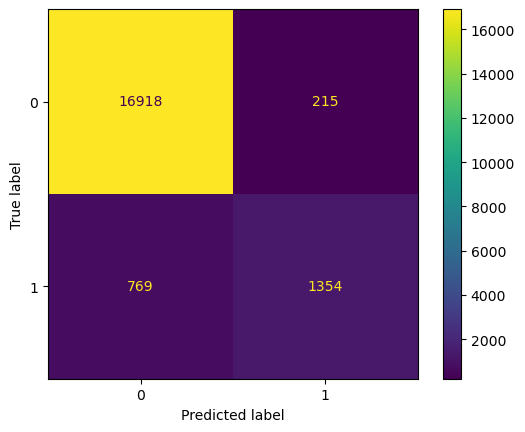

In [244]:
# 6 Confussion Matrix

cm = confusion_matrix(y_test, y_predictive, labels=model.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# ▶️

##  ✅ STAGE 06: Transforming the scale

In this case we are going to use Min and Max transformed

⚠️-NOTE:

Using SMOTE to balance our data, that calculates new synthetic data points using k-neighbors, the data needs to be scaled before balancing, because knn works using distances and if our variables are on different scales it will impact the results.


**In this case we are using Min and Max tranformer scaler (NORMALIZATION)**


⚠️-NOTE:

We JUST NEED TO apply normalization for our **independent Variables!!** 

In this case how we split our independen Variable "X" into X_train and X_test, we must scaled both variables!

In [250]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaler_train= scaler.transform(X_train)
X_scaler_test= scaler.transform(X_test)

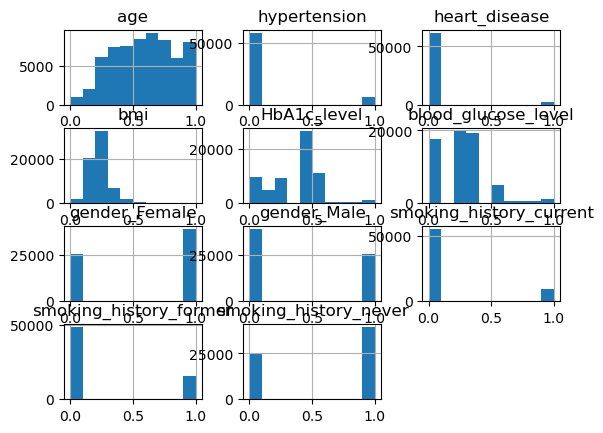

In [251]:
df_scaled.hist()
plt.show()

### Other way tranforming our data using Scaler

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X)
#X_scaled = scaler.transform(X)
#df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
#print(df_scaled.head)
#df_scaled.hist()
#plt.show()

## ✅ STAGE 06: Handle Imbalanced data


**Our new scaled Variables👀**

X_scaler_train

X_scaler_test

### 👉 Method N.01: Undersampling

Near Miss version 3 

In [168]:
import pandas as pd
from imblearn.under_sampling import NearMiss

In [278]:
undersampling = NearMiss(version=3, n_neighbors_ver3=3)

#X_resampled, y_resampled_train = undersampling.fit_resample(X_train, y_train)

X_undersampling_train, y_undersampling_train = undersampling.fit_resample(X_scaler_train, y_train)


In [279]:
model = LogisticRegression()
model.fit(X_undersampling_train, y_resampled_train)

LogisticRegression()

In [280]:
#3

y_predictive_using_undersampling= model_umbalenced.predict(X_scaler_test)

#4

accuracy = accuracy_score(y_test, y_predictive_using_undersampling)

print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 94.89%


In [282]:
rep = classification_report(y_test,y_predictive_using_undersampling)
print(rep)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17133
           1       0.86      0.64      0.73      2123

    accuracy                           0.95     19256
   macro avg       0.91      0.81      0.85     19256
weighted avg       0.95      0.95      0.95     19256



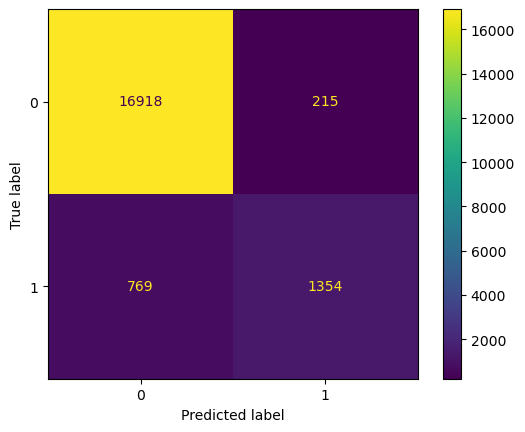

In [281]:
cm = confusion_matrix(y_test, y_predictive_using_undersampling, labels=model.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

### 👉 Method N.02: Oversampling

### 👉 Method N.03: Class Weight

In [255]:
from sklearn.linear_model import LogisticRegression

# Define the class weights
class_weights = {
    0: 1,  # weight for class 0 (majority class)
    1: 5   # weight for class 1 (minority class)
}

# Create the logistic regression model with class weights
model_class_weight = LogisticRegression(class_weight=class_weights)

# Fit the model to the training data
model_class_weight.fit(X_scaler_train, y_train)


LogisticRegression(class_weight={0: 1, 1: 5})

In [256]:
y_predictive_weight_class = model_class_weight.predict(X_scaler_test)

accuracy = accuracy_score(y_test, y_predictive_weight_class )

print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 91.08%


In [261]:
rep = classification_report(y_test,y_predictive_weight_class)
print(rep)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     17133
           1       0.57      0.81      0.67      2123

    accuracy                           0.91     19256
   macro avg       0.77      0.87      0.81     19256
weighted avg       0.93      0.91      0.92     19256



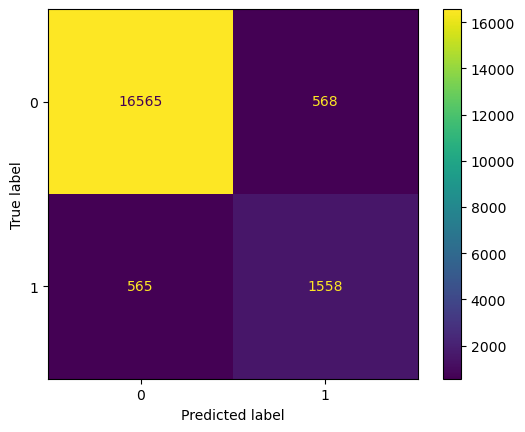

In [262]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

### 👉 Method N.04: SMOTE

In [254]:
from imblearn.over_sampling import SMOTE

# Create the SMOTE oversampling object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_smote_train, y_smote_train = smote.fit_resample(X_scaler_train, y_train)


### Let's check the performance of our model using SMOTE to balance our data

In [265]:
#2

model_smote = LogisticRegression()
model_smote.fit(X_smote_train, y_smote_train)


LogisticRegression()

In [273]:
#3

y_predictive_using_smote = model_umbalenced.predict(X_scaler_test)



In [274]:
#4

accuracy = accuracy_score(y_test, y_predictive_using_smote)

print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 94.89%


In [275]:
rep = classification_report(y_test,y_predictive_using_smote)
print(rep)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17133
           1       0.86      0.64      0.73      2123

    accuracy                           0.95     19256
   macro avg       0.91      0.81      0.85     19256
weighted avg       0.95      0.95      0.95     19256



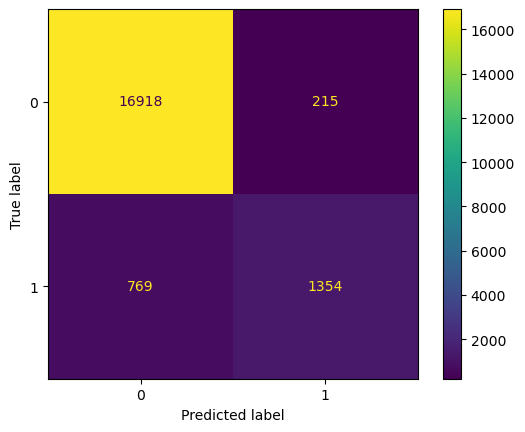

In [276]:
cm = confusion_matrix(y_test, y_predictive_using_smote, labels=model.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

👉  👉 👉 👉 👉 

## STAGE 07: Tranform the scale. In this case we are going to use Min and Max transformed

###  Note: we need to use since now the X_scale_train! because this will be our new X train, that is SCALER!

In [177]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_resampled)
X_scale_train= scaler.transform(X_resampled)

X_scale_test= scaler.transform(X_test)

#df_scaled = pd.DataFrame(X_scale_train, columns=X.columns)
#print(df_scaled.head())

#df_scaled.hist()
#plt.show()

## STAGE 08: Applying the Logistic Regression Model

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [180]:
#To create and fit the logistic model regression

model = LogisticRegression()
model.fit(X_scale_train, y_resampled_train)

#model.fit(X_train, y_train)

LogisticRegression()

### Generating our predictions

In [231]:
# Predict on the test set
y_pred = model.predict(X_scale_test)


### Checking our accuracy score

In [232]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 94.12%


## STAGE 09

### Printing a classification report and confusion matrix (error matrix)

### Confussion Matrix: How good our model performence

In [183]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [185]:
rep = classification_report(y_test,y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17133
           1       0.73      0.73      0.73      2123

    accuracy                           0.94     19256
   macro avg       0.85      0.85      0.85     19256
weighted avg       0.94      0.94      0.94     19256



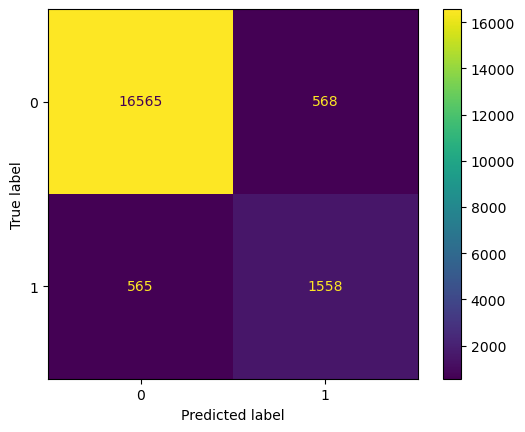

In [186]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [200]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [230]:
# Get the predicted probabilities for the positive class
y_prob_pred = model.predict_proba(X_scale_test)[:, 1]

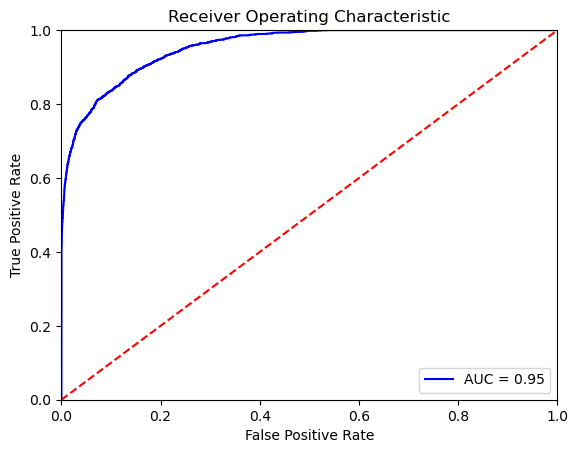

In [234]:
# Plot the ROC curve
import sklearn.metrics as metrics
probs = model.predict_proba(X_scale_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()